# ML FOR VIBRATION ANALYSIS PROJECT

### DATA INFORMATION
- The dataset includes triaxial vibration data of bearing of induction motor operated under different load conditions along the axes x, y, and z. 
- It includes triaxial vibration datasets of motor in healthy condition with and without pulley. The faulty conditions of bearings include inner race and outer race faults of (i) 0.7mm, (i) 0.9mm, (i) 1.1mm, (i) 1.3mm, (i) 1.5m, and (i) 1.7mm. 
- The bearings with these fault severity levels were operated under different load conditions including 100W, 200W, and 300W. There are total 38 datasets of the bearing conditions. 
- The data was acquired at the sampling rate of 10 kHz at the rate of 1000 samples per channel.

### DATA IMPORT AND PLOTTING

- First proceced data is the vibration measurement of motor in healthy condition without pulley. Name: DATA_HEALTY_NOPULLEY
- Second proceced data is the vibration measurement of motor in healthy condition with pulley. Name: DATA_HEALTY_PULLEY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.io as sio

- PROCESING FOR HEALTY WITHOUT PULLEY

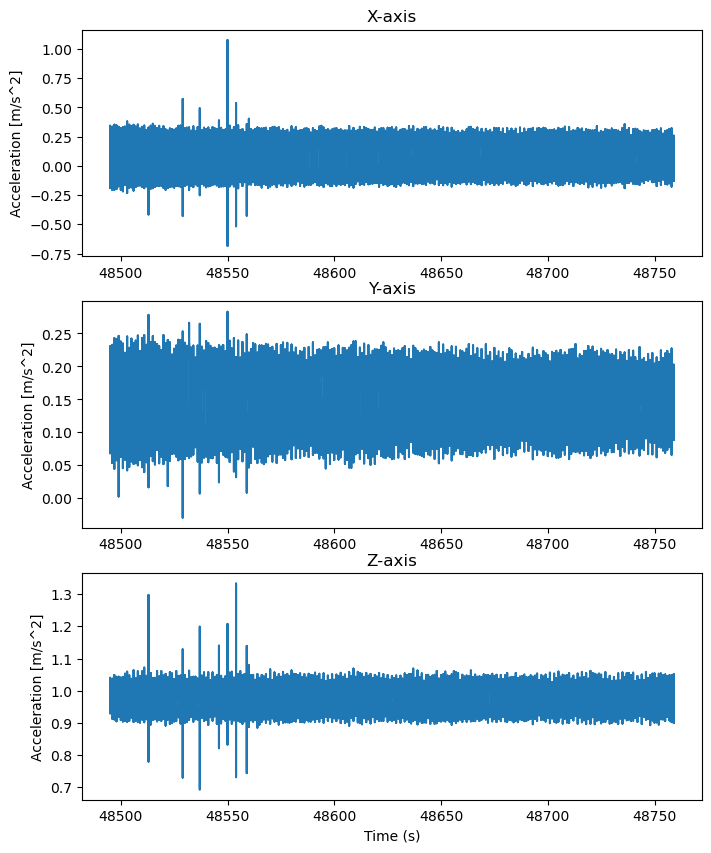

In [3]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\fede_\OneDrive\Documents\VIBRATION_ANALYSIS_PROYECT\Bearing dataset\Bearing_dataset\Healthy bearing data\healthy_without_pulley.csv')

# Rename columns and strip whitespace
df = df.rename(columns={'X-Axis': 'acc_x', 'Y-Axis': 'acc_y', 'Z-Axis': 'acc_z'})
df.columns = df.columns.str.strip()

# Convert the time values to float values
df['time_stamp'] = pd.to_timedelta(df['Time Stamp']).dt.total_seconds()

# Extract the values from the original columns and save them in the new columns
df['acc_x'] = df['X-axis']
df['acc_y'] = df['Y-axis']
df['acc_z'] = df['Z-axis']

# Ploting results
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(df['time_stamp'], df['acc_x'])
axs[0].set_ylabel('Acceleration [m/s^2]')
axs[0].set_title('X-axis')
axs[1].plot(df['time_stamp'], df['acc_y'])
axs[1].set_title('Y-axis')
axs[1].set_ylabel('Acceleration [m/s^2]')
axs[2].plot(df['time_stamp'], df['acc_z'])
axs[2].set_title('Z-axis')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration [m/s^2]')
plt.show()

- PROCESSING FOR HEALTY WITH PULLEY

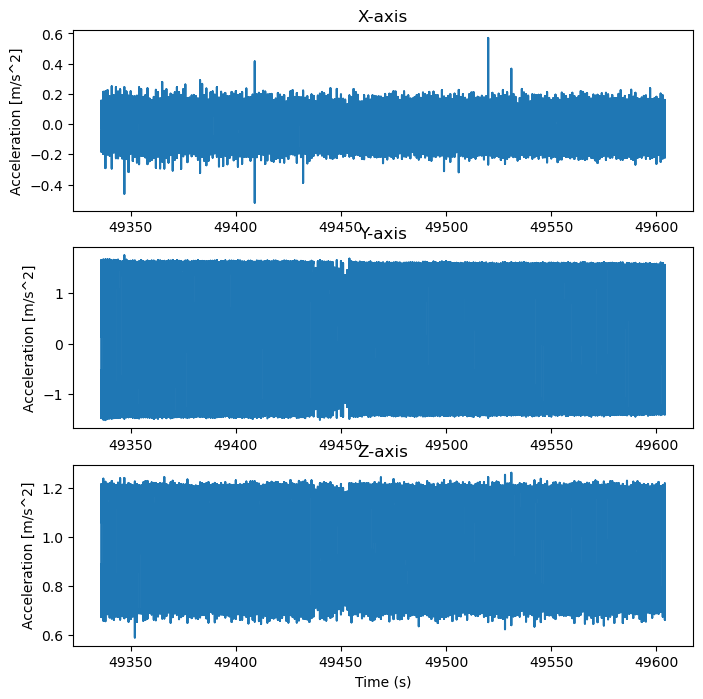

In [20]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\fede_\OneDrive\Documents\VIBRATION_ANALYSIS_PROYECT\Bearing dataset\Bearing_dataset\Healthy bearing data\Healthy_with_pulley.csv')

# Rename columns and strip whitespace
df = df.rename(columns={'X-Axis': 'acc_x', 'Y-Axis': 'acc_y', 'Z-Axis': 'acc_z'})
df.columns = df.columns.str.strip()

# Convert the time values to float values
df['time_stamp'] = pd.to_timedelta(df['Time Stamp']).dt.total_seconds()

# Extract the values from the original columns and save them in the new columns
df['acc_x'] = df['X-axis']
df['acc_y'] = df['Y-axis']
df['acc_z'] = df['Z-axis']

# Ploting results
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
axs[0].plot(df['time_stamp'], df['acc_x'])
axs[0].set_ylabel('Acceleration [m/s^2]')
axs[0].set_title('X-axis')
axs[1].plot(df['time_stamp'], df['acc_y'])
axs[1].set_title('Y-axis')
axs[1].set_ylabel('Acceleration [m/s^2]')
axs[2].plot(df['time_stamp'], df['acc_z'])
axs[2].set_title('Z-axis')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration [m/s^2]')
plt.show()

COMMENTS ABOUT RESULTS
- First, the presence of a pulley is causing additional vibrations due to imbalances or misalignments in the pulley or the belt that drives it. These additional vibrations are adding noise to the measured signal, and are not present in measurements made on the shaft without a pulley (whe can see that the magnitude of the plotted accelerations are smaller on the shaft without pulley)
- The second observaton to be made is that the pulley is acting as a resonant structure, amplifying certain frequencies of vibration, which traslates in a higher amplitude vibration signals. The task it will be to identify these frequencies in order to try to avoid them
- From now on, the used dataframe called "df" it is going to be for all remaining calculations the one representing the motor with pulley, to analyize the worst case escenario

### COMPUTE OF MEAN, RMS AND STANDARD DEVIATION

- The RMS value of the vibration signal in this case is important because it provides a measure of the amplitude of the vibration signal. The RMS value can also help determine if the vibration levels are within acceptable limits.
- The standard deviation and mean values are important because they provide a measure of the stability and consistency of the vibration signal over time. A stable and consistent vibration signal is indicative of well-functioning machinery or equipment, while deviations from the baseline can indicate potential problems or faults.

- Computing the mean of each column across all rows

In [ ]:
mean = np.mean(df, axis=0)
devstd = np.std(df, axis=0)
df_numeric = df.select_dtypes(include=[np.number])
rms = np.sqrt(np.mean(df_numeric**2))

- Computing mean, standard deviation and RMS over a window length of 1 second. 
- Visualizing the results and comparing them with mean, standard deviation and RMS of the whole signal previously computed.

In [36]:
# Extract the signal data from the DataFrame as a numpy array
signal = df[['acc_x', 'acc_y', 'acc_z']].values

# Set the window length in seconds
window_length = 1

# Compute the window size in samples
fs = 1000  # Sampling frequency
window_size = int(window_length * fs)

# Compute the mean, standard deviation, and RMS over each window
num_windows = int(len(signal) / window_size)
means = np.zeros(num_windows)
stds = np.zeros(num_windows)
rms = np.zeros(num_windows)

for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window = signal[start:end]
    means[i] = np.mean(window)
    stds[i] = np.std(window)
    rms[i] = np.sqrt(np.mean(window**2))

# Generate a time axis that spans the duration of the signal
t = np.linspace(0, len(signal) / fs, num=num_windows, endpoint=False)

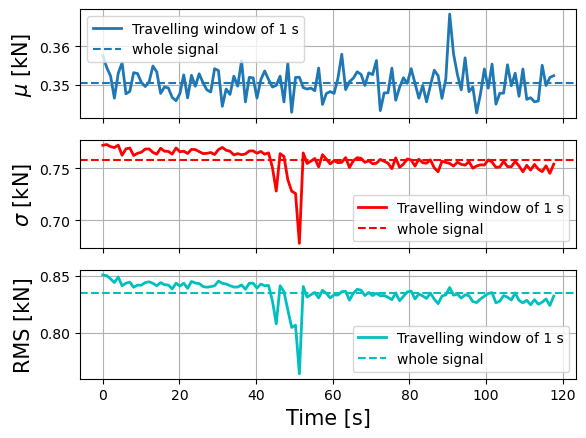

In [37]:
# Plot the results
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)
axs[0].plot(t, means, linewidth=2)
axs[0].set_ylabel('$\mu$ [kN]', fontsize=15)
axs[0].axhline(y=np.mean(signal), linestyle='--')
axs[0].grid(True)
axs[0].legend(['Travelling window of {} s'.format(window_length), 'whole signal'])

axs[1].plot(t, stds, 'r', linewidth=2)
axs[1].set_ylabel('$\sigma$ [kN]', fontsize=15)
axs[1].axhline(y=np.std(signal), linestyle='--', color='r')
axs[1].grid(True)
axs[1].legend(['Travelling window of {} s'.format(window_length), 'whole signal'])

axs[2].plot(t, rms, 'c', linewidth=2)
axs[2].set_ylabel('RMS [kN]', fontsize=15)
axs[2].axhline(y=np.sqrt(np.mean(signal**2)), linestyle='--', color='c')
axs[2].grid(True)
axs[2].legend(['Travelling window of {} s'.format(window_length), 'whole signal'])

# Set the x-axis label on the bottom plot
axs[-1].set_xlabel('Time [s]', fontsize=15)

# Display the plot
plt.show()

COMENTS ABOUT RESULTS:

- As we can see from the results in the time lapse between 40 and 60 seconds, the values of RMS and sigma have a drastic change respect to the trend of the rest of the values. This may indicate that in this lap exists the presence of a vibration mode, we will analyize this in the next steps when changing to frequency domain, and for sure this will be an important analysis point, since this data corresponds to the bearing normal work.  

### CONVERTION FROM TIME TO FREQUENCY DOMAIN

- When analyzing vibration signals as a function of time, which can reveal information about the amplitude, waveform, and timing of the vibration, but this representation can be limited in its ability to identify the specific frequencies that are contributing to the vibration

- For this reason, the data will be converted from the time domain to the frequency domain using the Fourier transform mathematical technique, to caracterize the frequencies of the vibration signal

- This will allows us to identify specific frequencies and harmonics that may be contributing to the overall vibration, as well as any resonant frequencies, vibration modes or other patterns in the vibration signal that may indicate a fault or issue with the bearing.

-Also, the frequency domain representation simplifies the analysis of vibration data by allowing to apply filters to reduce the amount of noise and other unwanted components that may be present in the time domain. This makes easier to identify patterns and frequencies in the signal, allowing us to make more accurate diagnoses and predictions about the health of the machinery.

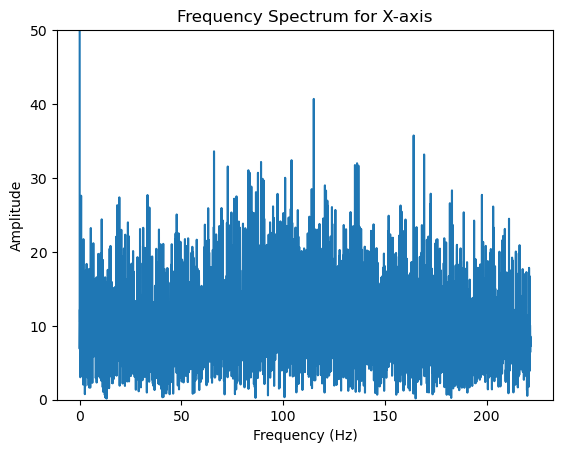

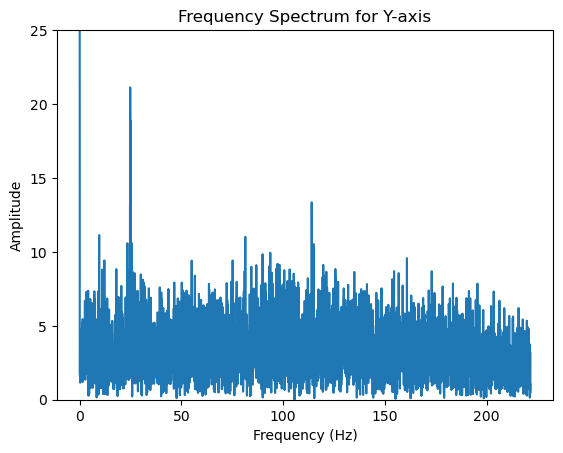

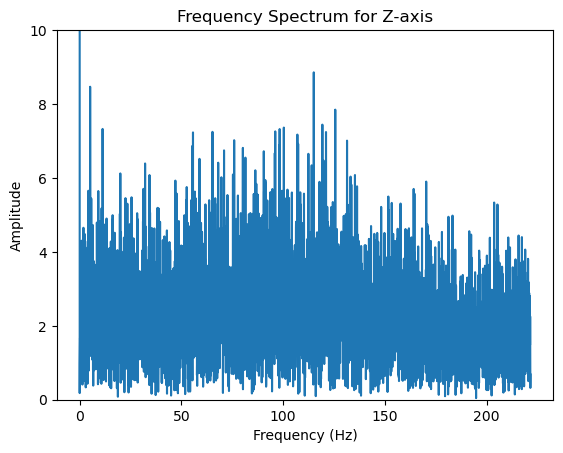

In [30]:
# Get the sampling frequency (assuming evenly-spaced time series)
fs = 1 / np.mean(np.diff(df['time_stamp']))

# Define the number of points for the FFT
n_points = 8192

# Loop through acceleration columns and apply FFT to each
for i, col in enumerate(df.columns[1:4]):
    acc = df[col]
    
    # Calculate the FFT with the specified number of points
    acc_fft = np.fft.fft(acc, n=n_points)
    
    # Get the corresponding frequencies
    freqs = np.fft.fftfreq(n_points, 1/fs)
    
    # Create a new figure and axis for each column
    fig, ax = plt.subplots()
    
    # Plot the frequency spectrum for each acceleration column
    ax.plot(freqs[:n_points//2], np.abs(acc_fft)[:n_points//2])
    
    # Set plot title and labels
    ax.set_title(f'Frequency Spectrum for {col}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    
    # Set the y-axis limits for each plot
    if i == 0:
        ax.set_ylim(0, 50)
    elif i == 1:
        ax.set_ylim(0, 25)
    else:
        ax.set_ylim(0, 10)
    # Set the x-axis limits for each plot
    axs[i].set_xlim(0, 100)

# Show the plots
plt.show()

### RMS MEAN AND STD DEVIATION CALCULATION ON FREQUENCY DOMAIN



- We are now going to calculate RMS, mean and standard deviation from vibration data to obtain information about the characteristics of the vibration signal.

- The RMS value is a measure of the overall amplitude or energy of the vibration signal in a given frequency range, and can be used to assess the severity of vibration and compare it to acceptable levels or standards. The RMS value can also be used to identify any changes in the vibration level over time, which can help with predictive maintenance and early detection of potential issues.

- The mean value in the frequency domain represents the average value of the signal over a given frequency range. It can be useful for identifying the dominant frequency components of the signal, as well as any trends or changes in the frequency content over time.

- The standard deviation (STD) in the frequency domain represents the variability of the signal around the mean value. It can be useful in identifying any unusual or unexpected patterns or fluctuations in the vibration signal, which may indicate a fault or issue with the machinery.

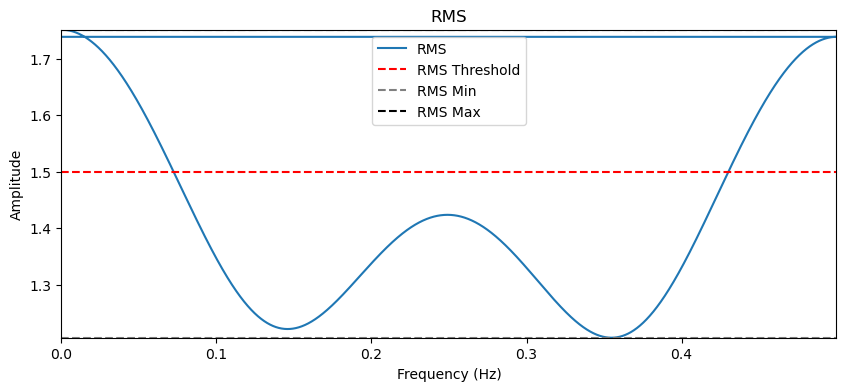

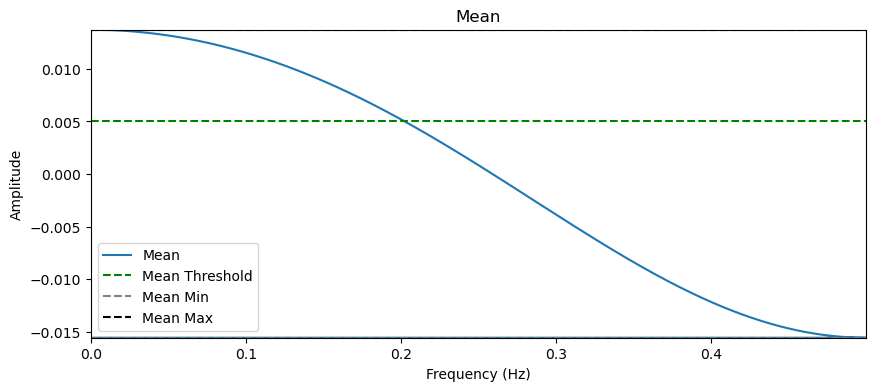

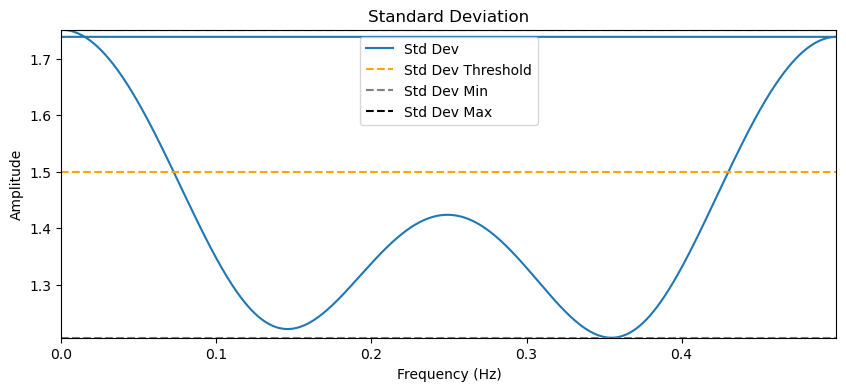

In [33]:
# Generate some sample data
n_points = 8192
freqs = np.fft.fftfreq(n_points)
acc = np.random.randn(n_points, 3)

# Calculate the FFT of the signal
acc_fft = np.fft.fft(acc, n=n_points)

# Take the real part of the FFT array
acc_fft = np.real(acc_fft)

# Define the threshold values for RMS, mean, and std deviation
rms_threshold_freq = 1.5
mean_threshold_freq = 0.005
std_threshold_freq = 1.5

# Calculate the RMS, mean, and standard deviation of each column
rms_freq = np.sqrt(np.mean(acc_fft**2, axis=0))
mean_freq = np.mean(acc_fft, axis=0)
std_freq = np.std(acc_fft, axis=0)

# Calculate the minimum and maximum values of each data array
rms_min = np.min(rms_freq)
rms_max = np.max(rms_freq)
mean_min = np.min(mean_freq)
mean_max = np.max(mean_freq)
std_min = np.min(std_freq)
std_max = np.max(std_freq)

# Plot RMS against threshold
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(freqs, rms_freq, label='RMS')
ax.axhline(rms_threshold_freq, color='red', linestyle='--', label='RMS Threshold')
ax.axhline(rms_min, color='gray', linestyle='--', label='RMS Min')
ax.axhline(rms_max, color='black', linestyle='--', label='RMS Max')
ax.set_title('RMS')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.set_ylim(rms_min, rms_max)
ax.set_xlim(0, np.max(freqs))

# Plot mean against threshold
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(freqs, mean_freq, label='Mean')
ax.axhline(mean_threshold_freq, color='green', linestyle='--', label='Mean Threshold')
ax.axhline(mean_min, color='gray', linestyle='--', label='Mean Min')
ax.axhline(mean_max, color='black', linestyle='--', label='Mean Max')
ax.set_title('Mean')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.set_ylim(mean_min, mean_max)
ax.set_xlim(0, np.max(freqs))

# Plot std deviation against threshold
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(freqs, std_freq, label='Std Dev')
ax.axhline(std_threshold_freq, color='orange', linestyle='--', label='Std Dev Threshold')
ax.axhline(std_min, color='gray', linestyle='--', label='Std Dev Min')
ax.axhline(std_max, color='black', linestyle='--', label='Std Dev Max')
ax.set_title('Standard Deviation')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.set_ylim(std_min, std_max)
ax.set_xlim(0, np.max(freqs))

# Show the plots
plt.show()


- CONCLUSIONS ABOUT THE RESULTS:

Using ISO 10816-3, as it is the standard that specifies vibration limits for rotating machinery based on the type of machine, its power rating, and the operating speed we can see that for induction motors, the standard provides different vibration limit values depending on the power rating and the type of motor mounting.

The vibration levels for induction motors specified in ISO 10816-3 are expressed in terms of vibration velocity (rms) in millimeters per second (mm/s) at the motor bearings. The allowable vibration velocity limits are given as a function of the motor's power rating, operating speed, and type of mounting.

For a horizontal foot-mounted induction motor with a power rating of 1 kW to 15 kW and operating at speeds between 1,000 RPM and 3,000 RPM, the allowable vibration velocity limit is 4.0 mm/s for the low alarm level and 11.0 mm/s for the high alarm level.

In our example, we have peak values for frequencies of 0, 0.25 and 0.5 Hz, where vibration amplitude increases but never reaching values of half of the minimum vibration level for this kind of motor.

This confirm that we can use this dataset as our correct solution to compare against with when training the machine learning model 